In [1]:
from copy import deepcopy

In [2]:
from pam.read import read_matsim
from pam.core import Population, Household, Person
from pam.activity import Plan, Activity, Leg
from pam.utils import minutes_to_datetime as mtdt
from pam.variables import END_OF_DAY

# Plan Scoring

In [3]:
test_plans = read_matsim(
    "../tests/test_data/1.plans.xml",
    version=12,
    simplify_pt_trips=False
    )

In [4]:
test_plans.households

{'heh_mm': <pam.core.Household at 0x113e3bef0>,
 'hwh_bus': <pam.core.Household at 0x113e3ff98>,
 'hwh_car': <pam.core.Household at 0x113e3b630>,
 'hwh_train': <pam.core.Household at 0x113e44978>}

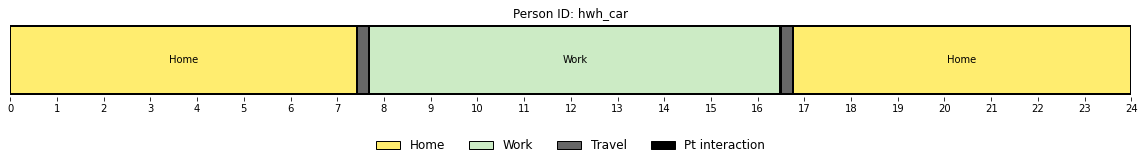

In [5]:
A = test_plans['hwh_car']['hwh_car']
A.plot()

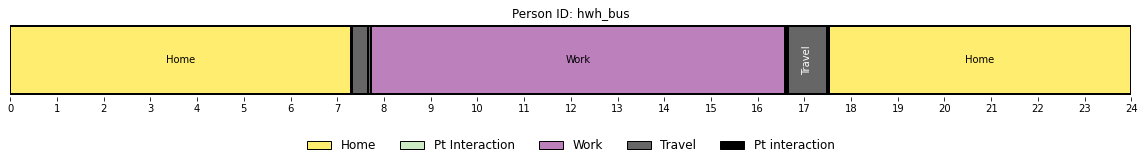

In [6]:
B = test_plans['hwh_bus']['hwh_bus']
B.plot()

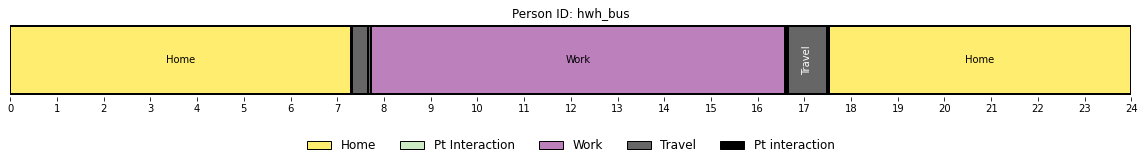

In [7]:
C = test_plans['hwh_train']['hwh_train']
B.plot()

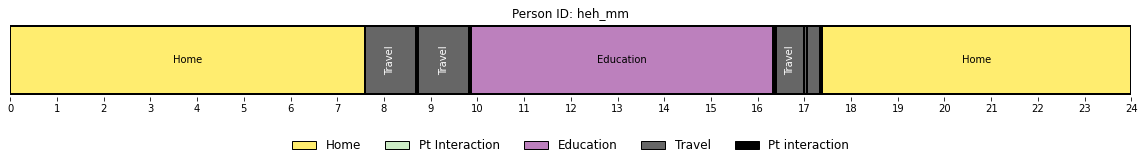

In [8]:
D = test_plans['heh_mm']['heh_mm']
D.plot()

In [9]:
from pam.scoring import CharyparNagelPlanScorer

default_config = {
    'mUM': 1,
    'utilityOfLineSwitch': -1,
    'performing': 6,
    'waiting': 0,
    'waitingPt': -2,
    'lateArrival': -18,
    'earlyDeparture': -0,
    'work': {
        'typicalDuration': '08:30:00',
        # 'openingTime': '06:00:00',
        # 'closingTime': '20:00:00',
        # 'latestStartTime': '09:30:00',
        # 'earliestEndTime': '16:00:00',
        "minimalDuration": "08:00:00"
        },
    'home': {
        'typicalDuration': '12:00:00',
        "minimalDuration": "08:00:00"
        },
    'shop': {
        'typicalDuration': '00:30:00',
        "minimalDuration": "00:10:00"
        },
    'education': {
        'typicalDuration': '08:30:00',
        "minimalDuration": "06:00:00"
        },
    'car': {
        # 'constant': -0,
        # 'dailyMonetaryConstant': -0,
        # 'dailyUtilityConstant': -0,
        # 'marginalUtilityOfDistance': -0,
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.0005
        },
    'pt': {
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'bus': {
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'train': {
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'walk': {
        'marginalUtilityOfTravelling': -12,
        },
    'bike': {
        'marginalUtilityOfTravelling': -12,
        }
    }

config = {subpop: default_config for subpop in [
    "default", "high income", "medium income", "low income", "freight"
    ]}

scorer = CharyparNagelPlanScorer(cnfg=config)

126.3181638094474


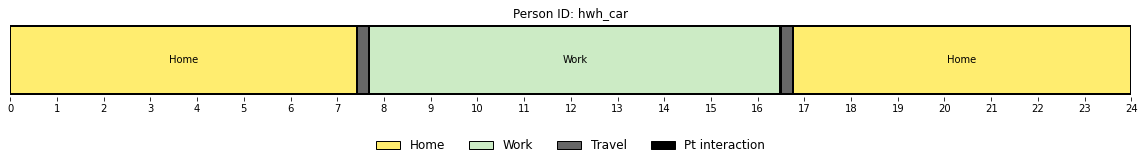

In [10]:
# 106.3096555797091
A.plot()
print(scorer.score_person(A))

In [11]:
scorer.summary(A)

Total plan score: 126.3181638094474
Total activities score: 139.10699714278073
Total legs score: -12.788833333333333
Pt interchanges score: 0
Day score: 0


(0) Activity: home
	Duration: 7:25:00
	Score: 37.355261051242024
	Duration_score: 37.355261051242024
	Waiting_score: 0.0
	Late_arrival_score: 0.0
	Early_departure_score: 0.0
	Too_short_score: 0.0

(1) Leg: car
	Distance: 10001.0 Duration: 0:16:42
	Score: -6.392166666666666
	Pt_waiting_time_score: 0.0
	Constant: 0.0
	Travel_time_score: -1.3916666666666666
	Travel_distance_score: -5.0005

(2) Activity: work
	Duration: 8:48:18
	Score: 52.79793250104684
	Duration_score: 52.79793250104684
	Waiting_score: 0.0
	Late_arrival_score: 0.0
	Early_departure_score: 0.0
	Too_short_score: 0.0

(3) Leg: car
	Distance: 10010.0 Duration: 0:16:42
	Score: -6.3966666666666665
	Pt_waiting_time_score: 0.0
	Constant: 0.0
	Travel_time_score: -1.3916666666666666
	Travel_distance_score: -5.005

(4) Activity: home
	Duration: 7:13:18
	Score: 35.43689640497492
	

114.84943200020696


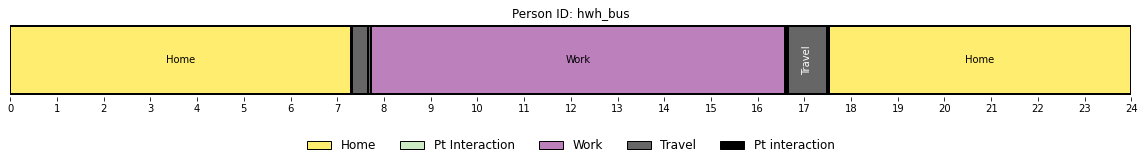

In [13]:
# -395.04390561542465 
B.plot()
print(scorer.score_person(B))

In [14]:
scorer.summary(B)

Total plan score: 114.84943200020696
Total activities score: 134.93959866687362
Total legs score: -20.090166666666665
Pt interchanges score: 0
Day score: 0


(0) Activity: home
	Duration: 7:17:01
	Score: 36.05184872521537
	Duration_score: 36.05184872521537
	Waiting_score: 0.0
	Late_arrival_score: 0.0
	Early_departure_score: 0.0
	Too_short_score: 0.0

(1) Leg: walk
	Distance: 130.0 Duration: 0:02:36
	Score: -0.52
	Pt_waiting_time_score: 0.0
	Constant: 0.0
	Travel_time_score: -0.52
	Travel_distance_score: 0.0

(2) Activity: pt interaction
	Duration: 0:00:00

(3) Leg: bus
	Distance: 5001.0 Duration: 0:20:23
	Score: -7.045722222222222
	Pt_waiting_time_score: -0.3461111111111111
	Constant: 0.0
	Travel_time_score: -1.698611111111111
	Travel_distance_score: -5.001

(4) Activity: pt interaction
	Duration: 0:00:00

(5) Leg: walk
	Distance: 183.84776310850236 Duration: 0:03:41
	Score: -0.7366666666666667
	Pt_waiting_time_score: 0.0
	Constant: 0.0
	Travel_time_score: -0.7366666666666667
	Travel_d

127.18561061906404


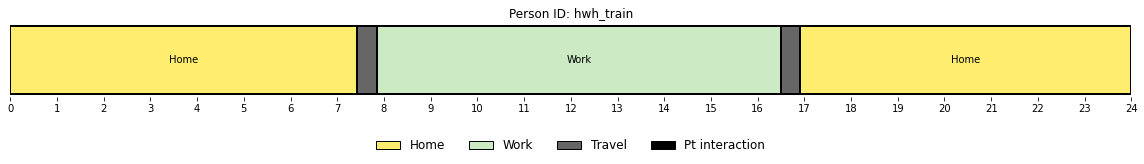

In [15]:
# 126.2569229376394 # cycle
C.plot()
print(scorer.score_person(C))

In [16]:
scorer.summary(C)

Total plan score: 127.18561061906404
Total activities score: 137.47894395239737
Total legs score: -10.293333333333333
Pt interchanges score: 0
Day score: 0


(0) Activity: home
	Duration: 7:25:00
	Score: 37.355261051242024
	Duration_score: 37.355261051242024
	Waiting_score: 0.0
	Late_arrival_score: 0.0
	Early_departure_score: 0.0
	Too_short_score: 0.0

(1) Leg: bike
	Distance: 6500.0 Duration: 0:26:00
	Score: -5.2
	Pt_waiting_time_score: 0.0
	Constant: 0.0
	Travel_time_score: -5.2
	Travel_distance_score: 0.0

(2) Activity: work
	Duration: 8:39:00
	Score: 51.89215102982338
	Duration_score: 51.89215102982338
	Waiting_score: 0.0
	Late_arrival_score: 0.0
	Early_departure_score: 0.0
	Too_short_score: 0.0

(3) Leg: bike
	Distance: 6370.0 Duration: 0:25:28
	Score: -5.093333333333334
	Pt_waiting_time_score: 0.0
	Constant: 0.0
	Travel_time_score: -5.093333333333334
	Travel_distance_score: 0.0

(4) Activity: home
	Duration: 7:04:32
	Score: 33.96523063765736
	Duration_score: 33.96523063765736
	Wa

73.86719570008887


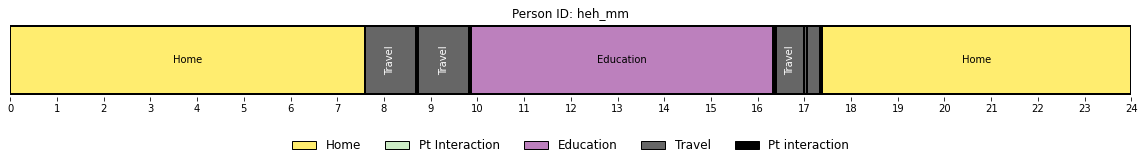

In [17]:
# -401.34057228209133
D.plot()
print(scorer.score_person(D))

In [18]:
scorer.summary(D)

Total plan score: 73.86719570008887
Total activities score: 121.16691792231109
Total legs score: -47.29972222222222
Pt interchanges score: -4
Day score: 0


(0) Activity: home
	Duration: 7:35:22
	Score: 39.01332551149662
	Duration_score: 39.01332551149662
	Waiting_score: 0.0
	Late_arrival_score: 0.0
	Early_departure_score: 0.0
	Too_short_score: 0.0

(1) Leg: walk
	Distance: 0.0 Duration: 0:00:00
	Score: 0.0
	Pt_waiting_time_score: 0.0
	Constant: 0.0
	Travel_time_score: -0.0
	Travel_distance_score: 0.0

(2) Activity: pt interaction
	Duration: 0:00:00

(3) Leg: train
	Distance: 5010.0 Duration: 1:05:38
	Score: -12.33388888888889
	Pt_waiting_time_score: -1.8544444444444443
	Constant: 0.0
	Travel_time_score: -5.469444444444445
	Travel_distance_score: -5.01

(4) Activity: pt interaction
	Duration: 0:00:00

(5) Leg: walk
	Distance: 183.84776310850236 Duration: 0:03:40
	Score: -0.7333333333333333
	Pt_waiting_time_score: 0.0
	Constant: 0.0
	Travel_time_score: -0.7333333333333333
	Travel_distan

# Toy Data

In [19]:
default_config = {
    'mUM': 1,
    'utilityOfLineSwitch': -1,
    'performing': 6,
    'waiting': -1,
    'waitingPt': -2,
    'lateArrival': -18,
    'earlyDeparture': -6,
    'work': {
        'typicalDuration': '08:30:00',
        'openingTime': '06:00:00',
        'closingTime': '20:00:00',
        'latestStartTime': '09:30:00',
        'earliestEndTime': '16:00:00',
        "minimalDuration": "08:00:00"
        },
    'home': {
        'typicalDuration': '09:00:00',
        "minimalDuration": "06:00:00",
        'earliestEndTime': '06:00:00',
        },
    'shop': {
        'openingTime': '06:00:00',
        'closingTime': '20:00:00',
        'typicalDuration': '00:30:00',
        "minimalDuration": "00:30:00"
        },
    'education': {
        'openingTime': '09:00:00',
        'closingTime': '16:00:00',
        'typicalDuration': '07:00:00',
        "minimalDuration": "06:00:00",
        'latestStartTime': '09:00:00',
        'earliestEndTime': '15:30:00',
        },
    'car': {
        'constant': -5,
        'dailyMonetaryConstant': -0,
        'dailyUtilityConstant': -0,
        'marginalUtilityOfDistance': -0,
        'marginalUtilityOfTravelling': -0,
        'monetaryDistanceRate': -0.0005
        },
    'bus': {
        'dailyMonetaryConstant': -5,
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'train': {
        'dailyMonetaryConstant': -5,
        'marginalUtilityOfTravelling': -5,
        'monetaryDistanceRate': -0.001
        },
    'walk': {
        'marginalUtilityOfTravelling': -12,
        },
    'bike': {
        'marginalUtilityOfTravelling': -12,
        }
    }

config = {subpop: default_config for subpop in [
    "default"
    ]}

scorer = CharyparNagelPlanScorer(cnfg=config)

In [20]:
personA = Person('Ahmed', attributes={'age': 20, 'subpopulation': 'default'})
personA.plan.day = [
    Activity(act='home', area=1, start_time=mtdt(0), end_time=mtdt(420)),
    Leg(mode='car', start_area=1, end_area=2, start_time=mtdt(420), end_time=mtdt(480), distance=1000),
    Activity(act='shop', area=2, start_time=mtdt(480), end_time=mtdt(510)),
    Leg(mode='walk', start_area=2, end_area=3, start_time=mtdt(510), end_time=mtdt(570), distance=1000),
    Activity(act='work', area=3, start_time=mtdt(570), end_time=mtdt(960)),
    Leg(mode='car', start_area=3, end_area=1, start_time=mtdt(960), end_time=mtdt(1020), distance=1000),
    Activity(act='home', area=1, start_time=mtdt(1020), end_time=END_OF_DAY)
]

personB = Person('Brenda', attributes={'age': 20, 'subpopulation': 'default'})
personB.plan.day = [
    Activity(act='home', area=1, start_time=mtdt(0), end_time=mtdt(300)),
    Leg(mode='car', start_area=1, end_area=2, start_time=mtdt(300), end_time=mtdt(360), distance=1000),
    Activity(act='shop', area=2, start_time=mtdt(360), end_time=mtdt(420)),
    Leg(mode='walk', start_area=2, end_area=3, start_time=mtdt(420), end_time=mtdt(480), distance=1000),
    Activity(act='work', area=3, start_time=mtdt(480), end_time=mtdt(1320)),
    Leg(mode='car', start_area=3, end_area=1, start_time=mtdt(1320), end_time=mtdt(1380), distance=1000),
    Activity(act='home', area=1, start_time=mtdt(1380), end_time=END_OF_DAY)
]

personC = Person('Cookie', attributes={'age': 20, 'subpopulation': 'default'})
personC.plan.day = [
    Activity(act='home', area=1, start_time=mtdt(0), end_time=mtdt(120)),
    Leg(mode='car', start_area=1, end_area=2, start_time=mtdt(120), end_time=mtdt(180), distance=1000),
    Activity(act='shop', area=2, start_time=mtdt(180), end_time=mtdt(420)),
    Leg(mode='walk', start_area=2, end_area=3, start_time=mtdt(420), end_time=mtdt(480), distance=1000),
    Activity(act='work', area=3, start_time=mtdt(480), end_time=mtdt(1320)),
    Leg(mode='car', start_area=3, end_area=1, start_time=mtdt(1320), end_time=mtdt(1380), distance=1000),
    Activity(act='home', area=1, start_time=mtdt(1380), end_time=END_OF_DAY)
]

personA.validate()
personB.validate()
personC.validate()

True

Ahmed's score = 95.17750530673948


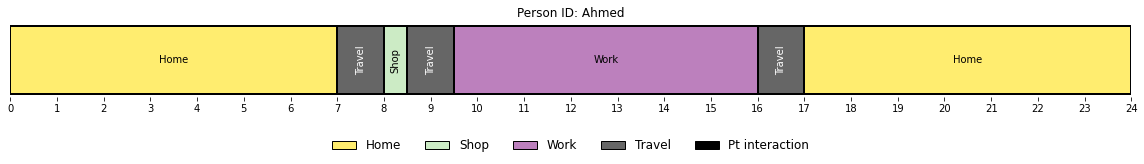

In [21]:
print(f"{personA.pid}'s score = {scorer.score_person(personA)}")
personA.plot()

Brenda's score = 76.77119050471717


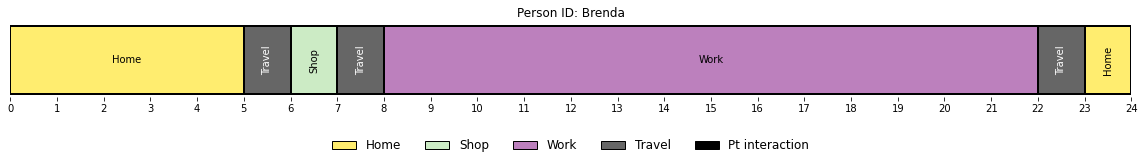

In [22]:
print(f"{personB.pid}'s score = {scorer.score_person(personB)}")
personB.plot()


Cookie's score = 17.489828159337932


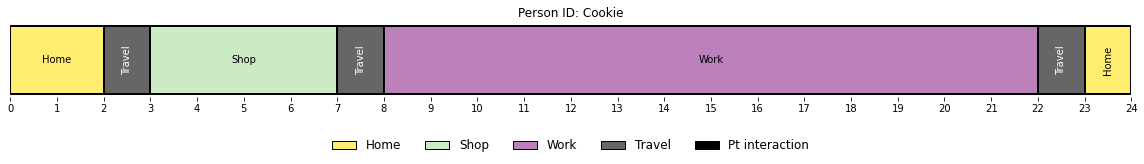

In [23]:
print(f"{personC.pid}'s score = {scorer.score_person(personC)}")
personC.plot()

# Applying Policies

Imagine if we could do utility optimisation including activity modifications.

Potential:
- If we can do this outside of MATSim we can potential go much faster/include more complexity
- We can pre-start matsim populations
- We can (pre-matsim) calibrate scoring params based on observations

In [24]:
from pam.policy import *

person A score = 100.67377079947636


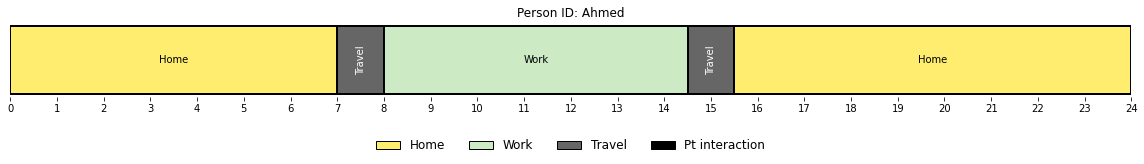

In [25]:
modifier = RemoveActivity(["shop"])
modifier.apply_to(household=None, person=personA)
print(f"person A score = {scorer.score_person(personA)}")
personA.plot()

Challenges:
- Without simulation we are approximting 'assignment' (loosing detailed interactions for example)
- Need to think about scraping trips (ideally from simulation)
- Need this to be fast
- Not convinced at the moment that the Charypar Nagel is suitable for full activity modelling (ie new activities and locations)

# Calibration

## Optimising utility score sans MATSim

Note that we are not messing with the sequence or the trips, or locations - so trips distances and times do not vary.

### Random Search for Optima

In [27]:
from matplotlib import pyplot as plt
from pam.optimise.random import reschedule
from pam.optimise.grid import grid_search

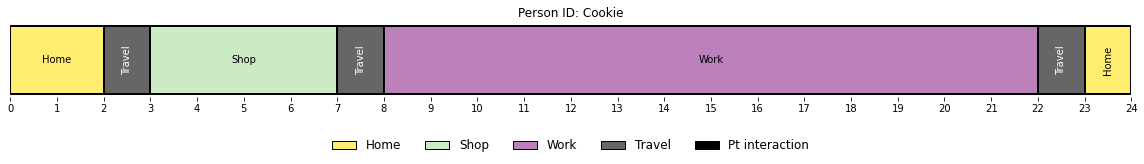

In [28]:
personC.plot()

Initial best score at iteration 0: 17.489828159337932
New best score at iteration 0: 21.779517676369082
New best score at iteration 1: 25.70786578286056
New best score at iteration 10: 36.40569091521414
New best score at iteration 17: 38.17902020055102
New best score at iteration 19: 40.6559441458253
New best score at iteration 52: 43.688021255851595
New best score at iteration 71: 61.39343972133145
New best score at iteration 92: 61.822375229475455
New best score at iteration 647: 69.71622772681829
New best score at iteration 1156: 72.80925120033636


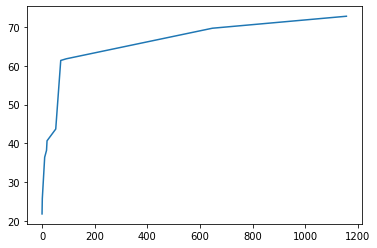

In [29]:
plan, log = reschedule(
    personC.plan,
    plans_scorer=scorer,
    config=config['default'],
    patience=10000
    )
plt.plot(list(log.keys()), list(log.values()))

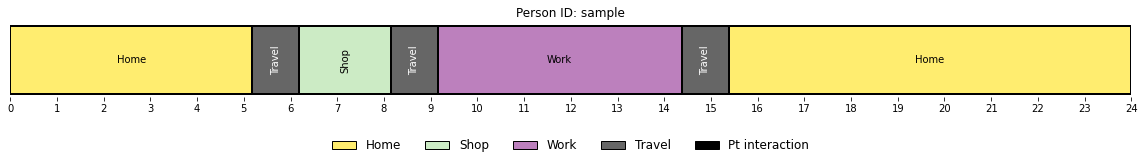

In [30]:
plan.validate()
plan.plot()

### Grid Search for Optima

66.96925826931134


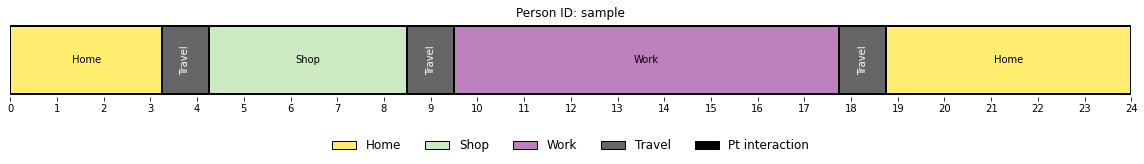

In [31]:
best_score, best_plan = grid_search(
    personC.plan, scorer, config["default"], step=900
    )
best_plan.validate()
print(best_score)
best_plan.plot()
personD = deepcopy(personC)
personD.plan = best_plan

In [32]:
scorer.summary(personD)

Total plan score: 66.96925826931134
Total activities score: 89.96925826931134
Total legs score: -23.0
Pt interchanges score: 0
Day score: 0


(0) Activity: home
	Duration: 3:15:00
	Score: -17.710105727405644
	Duration_score: -1.210105727405643
	Waiting_score: 0.0
	Late_arrival_score: 0.0
	Early_departure_score: -16.5
	Too_short_score: -16.5

(1) Leg: car
	Distance: 1000 Duration: 1:00:00
	Score: -5.5
	Pt_waiting_time_score: 0.0
	Constant: -5
	Travel_time_score: 0.0
	Travel_distance_score: -0.5

(2) Activity: shop
	Duration: 4:15:00
	Score: 6.0783137373023015
	Duration_score: 7.8283137373023015
	Waiting_score: -1.75
	Late_arrival_score: 0.0
	Early_departure_score: 0.0
	Too_short_score: 0.0

(3) Leg: walk
	Distance: 1000 Duration: 1:00:00
	Score: -12.0
	Pt_waiting_time_score: 0.0
	Constant: 0.0
	Travel_time_score: -12.0
	Travel_distance_score: 0.0

(4) Activity: work
	Duration: 8:15:00
	Score: 49.477498879366266
	Duration_score: 49.477498879366266
	Waiting_score: 0.0
	Late_arrival_score:

### Can we go faster?
- We have a good initial plan - no need to search
- We can also implement powerful heuristics (eg don't start earlier than opening time)

# Applications
1. (Once working) we can use this to pre-optimise plans for a given scoring configuration
2. We can explore the expected outcome for new configurations
3. **We can pre-calibrate scoring params to match observations**
4. We can introduce more complexity to start towards full activity modelling

### Next steps
- Validate and test scoring
- Test grid search
- probably build some toy problems
- Profile optimisers
- Implement better optimisers
- Implement plans and population loss functions (how far is this plan or population from the observed?)
- Implement scoring configuration optimiser (eg calibration sans matsim)
